In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('dark')
import warnings
warnings.filterwarnings("ignore")

##ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
data=pd.read_csv("UCI_Credit_Card.csv",index_col='ID')

In [3]:
data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
8,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
9,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [5]:
#distribution of the numeric variables
data.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month'],axis=1).describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [6]:
#checking if there are any missing values in the dataset
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month']

In [9]:
#checking the categorical values 
for col in columns:
    values=data[col].value_counts()
    print("The number categorical values in {} are\n{} " .format(col,values))

The number categorical values in SEX are
2    18112
1    11888
Name: SEX, dtype: int64 
The number categorical values in EDUCATION are
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 
The number categorical values in MARRIAGE are
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 
The number categorical values in PAY_0 are
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64 
The number categorical values in PAY_2 are
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64 
The number categorical values in PAY_3 are
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64 
The number categorical values i

In [10]:
#Grouping categories 4:others, 5:unknown, and 6:unknown to a single class '4' in Education variable
data['EDUCATION'].replace([0,5,6],4,inplace=True)

#Grouping category 0:unlabeled to single class '3'
data['MARRIAGE'].replace(0,4,inplace=True)

#Renaming label column
data.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)

In [11]:
#checking if the changes have been applied
columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT']

for col in columns:
    values=data[col].value_counts()
    print("The number categorical values in {} are\n{} " .format(col,values))

The number categorical values in SEX are
2    18112
1    11888
Name: SEX, dtype: int64 
The number categorical values in EDUCATION are
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64 
The number categorical values in MARRIAGE are
2    15964
1    13659
3      323
4       54
Name: MARRIAGE, dtype: int64 
The number categorical values in PAY_0 are
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64 
The number categorical values in PAY_2 are
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64 
The number categorical values in PAY_3 are
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64 
The number categorical values in PAY_4 are
 0    16455
-1     56

In [12]:
#replacing the integers with the names in the categorical variables
#SEX variable
sex={'SEX':{1:"male",2:'female'}}
data.replace(sex,inplace=True)

#EDUCATION variable
education={'EDUCATION':{1 :'graduate school',2 : 'university',3 : 'high school',4 : 'others'}}
data.replace(education,inplace=True)

#MARRIEGE variable
marriage={'MARRIAGE':{1:"married", 2:"single", 3:"others"}}
data.replace(marriage,inplace=True)


In [13]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,female,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,male,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


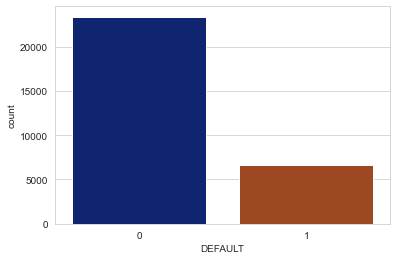

In [14]:
#count plot for defaulters
sns.countplot(data['DEFAULT'])

#From below chart we notice the number of those who defaukted their loan is high compared to those who paid

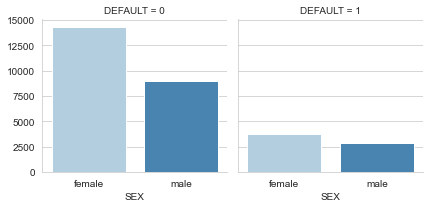

In [15]:
#default rate between the genders
# 1=male, 2=female
# 1=yes, 0=no
a=sns.FacetGrid(data,col='DEFAULT')
a.map(sns.countplot,'SEX',palette="Blues") 
a.add_legend()
    
#from bellow chart we notice that female have the highest number of deafulters      

SEX      female  male
DEFAULT              
0         14349  9015
1          3763  2873
AxesSubplot(0.125,0.125;0.775x0.755)


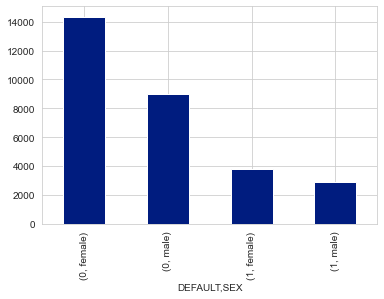

In [16]:
#Above chart can be summarized by grouping DEFAULTERS and SEX data by SEX variable and using sum metric 
group=data.groupby(['DEFAULT','SEX'])['SEX'].count()
print(group.unstack())
print(group.plot(kind='bar'))

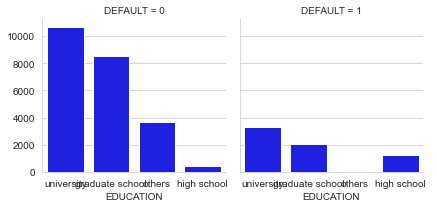

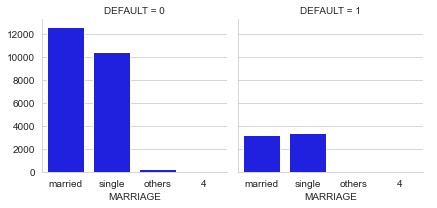

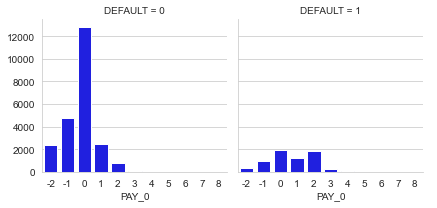

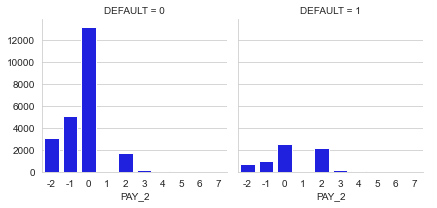

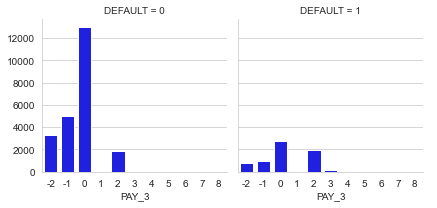

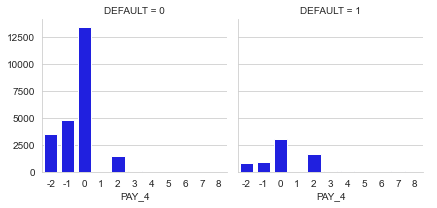

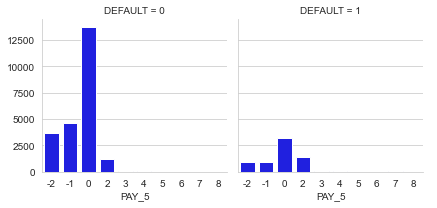

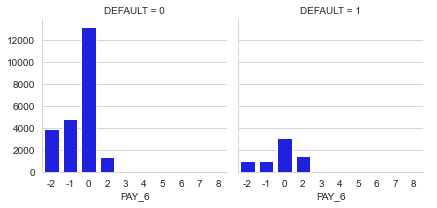

In [17]:
#Distribution pf categorical variables on DEAFULT variable
columns=['EDUCATION','MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in columns:
    b=sns.FacetGrid(data,col='DEFAULT')
    b.map(sns.countplot,col,color='blue') 
    b.add_legend()

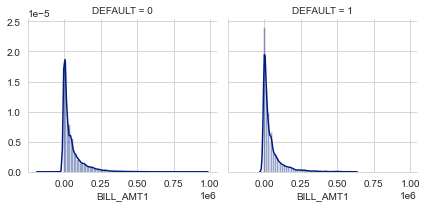

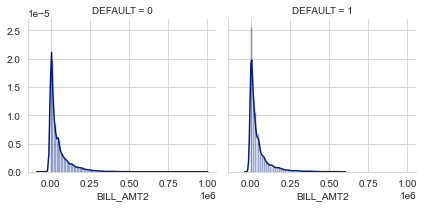

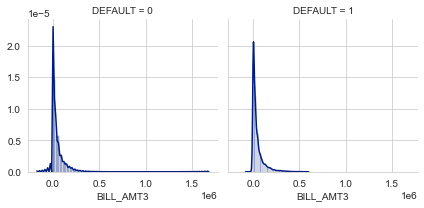

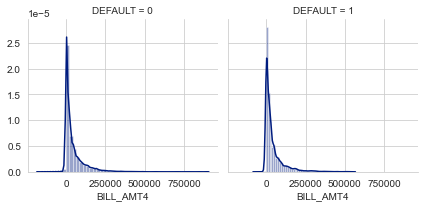

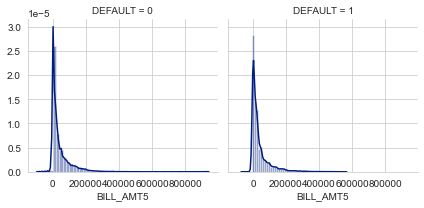

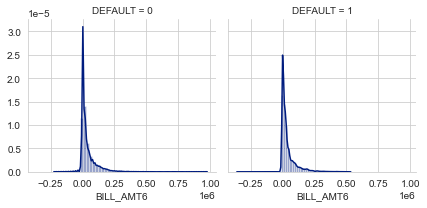

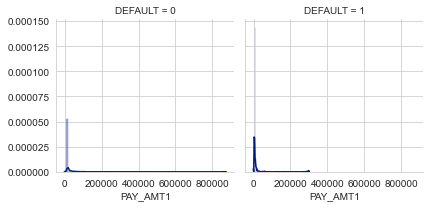

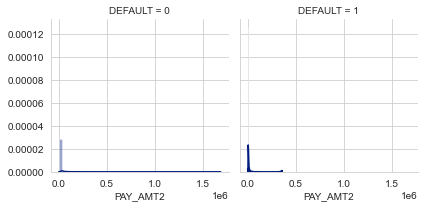

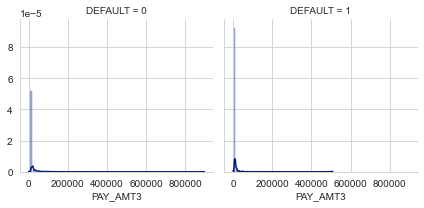

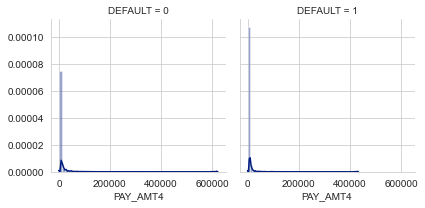

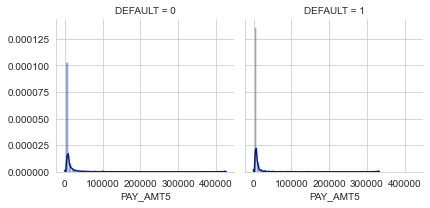

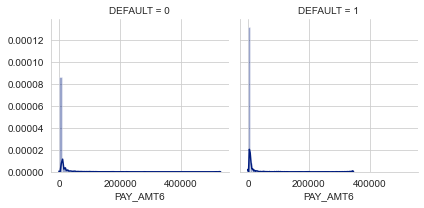

In [18]:
#distribution of numerical variables in both 0 and 1
columns=['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in columns:
    a=sns.FacetGrid(data,col="DEFAULT")
    a.map(sns.distplot, col)

In [19]:
#Total count of categorical data grouped by DEFAULT
data.groupby(['DEFAULT'])['EDUCATION','MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',].count()

,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
DEFAULT,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636


In [20]:
#Finding the correction between the independent variables
data.corr()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149
PAY_6,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,...,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.186866
BILL_AMT1,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,...,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
BILL_AMT2,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,...,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193


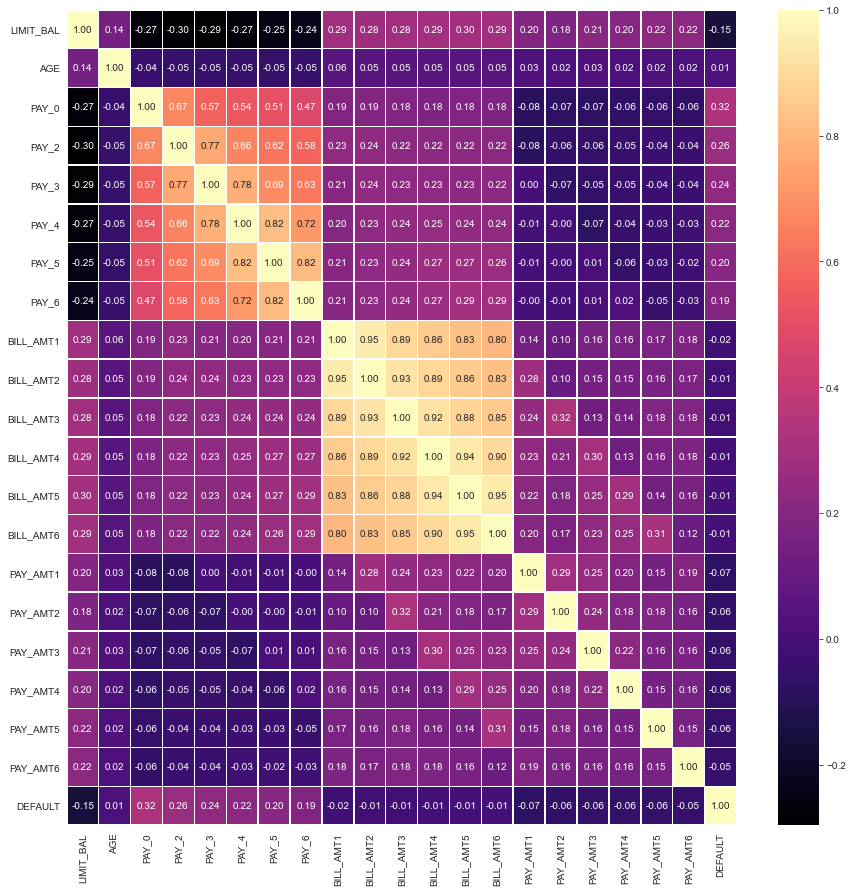

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor='white',cmap='magma',fmt=".2f")

In [22]:
#On a normal day you are suppose to eliminate variables with correlation above 0.7  to avoid multicoliniality but for now am not goin to eliminate any

In [23]:
#Binning AGE variable(Grouping the data into specific range/Categories)
data['AGE']=pd.cut(data['AGE'],6,labels=['20-30','30-40','40-50','50-60','60-70','70-80'])
data['AGE'].value_counts()

20-30    11013
30-40    10713
40-50     6005
50-60     1930
60-70      314
70-80       25
Name: AGE, dtype: int64

In [24]:
#dividing the dataframe into label and independent variables
label=data['DEFAULT']
predData=data.drop('DEFAULT',axis=1)


In [25]:
predData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,female,university,married,20-30,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,female,university,single,20-30,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,female,university,single,30-40,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,female,university,married,30-40,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,male,university,married,50-60,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [26]:
##Creating Dummy Variables
dummyData = pd.get_dummies(predData[['SEX',"AGE",'EDUCATION', 'MARRIAGE']],drop_first=False)
dummyData

,SEX_female,SEX_male,AGE_20-30,AGE_30-40,AGE_40-50,AGE_50-60,AGE_60-70,AGE_70-80,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_4,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
ID,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
5,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
29997,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
29998,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [27]:
#creating a new dataframe by dropping 'SEX', 'EDUCATION', 'MARRIAGE' from the old dataframe and concating it with the dataframe containing dummy variables
finalData=pd.concat([dummyData,predData.drop(['SEX', 'EDUCATION', 'MARRIAGE','AGE'],axis=1)],axis=1)
finalData.head()

,SEX_female,SEX_male,AGE_20-30,AGE_30-40,AGE_40-50,AGE_50-60,AGE_60-70,AGE_70-80,EDUCATION_graduate school,EDUCATION_high school,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,1,0,0,1,0,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,1,0,0,1,0,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,0,1,0,0,0,1,0,0,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## Normalizing the data
#Since some variables like BILL_AMT4 have a huge difference between the minimum and maximum vlues. This might increase the probability of having an outlier and this might affect the accuracy of the results. To avoid this,you have to feature scale the data by standardizing or normalizing the data

In [28]:
# Am going to Normalize my data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
normData=scaler.fit(finalData)
normData=scaler.transform(finalData)
#cobverting the results to Pandas dataframe
newData=pd.DataFrame(normData,columns=finalData.columns)
newData.head()

,SEX_female,SEX_male,AGE_20-30,AGE_30-40,AGE_40-50,AGE_50-60,AGE_60-70,AGE_70-80,EDUCATION_graduate school,EDUCATION_high school,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


## Creation of the model

In [29]:
#split the data 
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(newData,label,test_size=0.3,random_state=11)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(21000, 35) (9000, 35) (21000,) (9000,)


In [31]:
#importing the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
pred=model.predict(x_test)

In [33]:
#Evaluatin the model
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[6770  198]
 [1541  491]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      6968
           1       0.71      0.24      0.36      2032

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.62      9000
weighted avg       0.79      0.81      0.77      9000



#### since the data is imbalanced and its a classification model, we use AUC/ROC curve to determine the accuracy of the model

In [34]:

#import necessary library for 
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

In [35]:
auc = roc_auc_score(y_test, pred)  
print('AUC: %.2f' % auc)

AUC: 0.61


###### From above AUC (0.61),we notice that the model is not that good in predict . We will have to: 1. Go through the data again 2.Try to hypertune some of the parameters or 3. Chnage the method of feature scaling

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

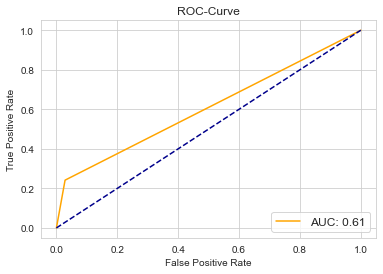

In [37]:
plt.plot(fpr, tpr, color='orange', label='AUC:' + ' {0:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc = 'lower right', fontsize = 12)

In [38]:
#saving the model for dployment/use
import pickle

model1=p